# ***Cifar10 Dataset***
## Method: Learning Classifer System

## **Initial Setup**

---
Before Implementing this Algorithm, Install eLCS package on Google Collab.

---










In [ ]:
pip install scikit-eLCS

Set up Tensorflow packages and LabelBinarizer to for future use

---



In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer

# **Data Setup**

---



In [ ]:
cifar10=tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test= x_train/ 255.0, x_test /255.0
Y_train=LabelBinarizer().fit_transform(y_train)
Y_test=LabelBinarizer().fit_transform(y_test)

# **Model Setup**

---



In [ ]:
from skeLCS import eLCS

model = eLCS()

In [ ]:
model = eLCS(learning_iterations = 50,nu = 10)

# **Image processing**

---
This section splits up and reconstructs the image in a way where the image can be properly process through the eLCS model. 

---




In [ ]:
a=len(x_train)
b=len(x_train[0])
c=len(x_train[0][0])
d=len(x_train[0][0][0])
e=b*c*d

x_train_1=x_train.reshape([a,e])
y_train=y_train.reshape([a,])

# **PCA**

---

In [ ]:
from sklearn.decomposition import PCA
x_train_reduced = PCA(n_components=200).fit_transform(x_train_1)

# **Model Training**

---



In [ ]:
model = eLCS(learning_iterations = 50,track_accuracy_while_fit=True)
trainedModel = model.fit(x_train_reduced,y_train)

trainedModel

eLCS(N=1000, acc_sub=0.99, beta=0.2, chi=0.8, delta=0.1,
     discrete_attribute_limit=10, do_GA_subsumption=True,
     do_correct_set_subsumption=False, fitness_reduction=0.1, init_fit=0.01,
     learning_iterations=50, match_for_missingness=False, mu=0.04, nu=5,
     p_spec=0.5, random_state=None, reboot_filename=None,
     selection_method='tournament',
     specified_attributes=array([], dtype=float64), theta_GA=25, theta_del=20,
     theta_sel=0.5, theta_sub=20, track_accuracy_while_fit=True)

# **ROC Curve**

---



In [ ]:
f=len(x_test)
g=len(x_test[0])
h=len(x_test[0][0])
i=len(x_test[0][0][0])
j=g*h*i

x_test_1=x_test.reshape([f,j])

In [ ]:
x_test_reduced = PCA(n_components=200).fit_transform(x_test_1)

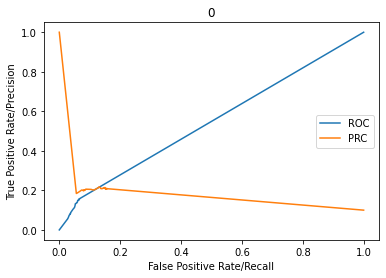

PRC AUC:0.1838941292075919
ROC AUC:0.5454906666666667


In [ ]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

probs = trainedModel.predict_proba(x_test_reduced)
fpr1, tpr1, thresholds1 = roc_curve(Y_test[:,0], probs[:, 0])
prec1, recall1, thresholds1 = precision_recall_curve(Y_test[:,0], probs[:, 0])

plt.plot(fpr1,tpr1,label="ROC")
plt.plot(recall1,prec1,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('0')
plt.show()

print("PRC AUC:" + str(auc(recall1, prec1)))
print("ROC AUC:" + str(auc(fpr1, tpr1)))

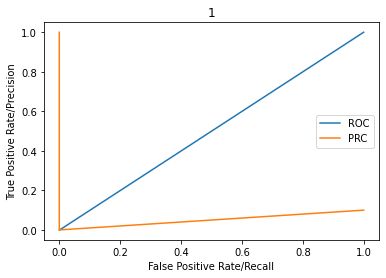

PRC AUC:0.05
ROC AUC:0.49933333333333335


In [ ]:
fpr2, tpr2, thresholds2 = roc_curve(Y_test[:,1], probs[:, 1])
prec2, recall2, thresholds2 = precision_recall_curve(Y_test[:,1], probs[:, 1])

plt.plot(fpr2,tpr2,label="ROC")
plt.plot(recall2,prec2,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('1')
plt.show()

print("PRC AUC:" + str(auc(recall2, prec2)))
print("ROC AUC:" + str(auc(fpr2, tpr2)))

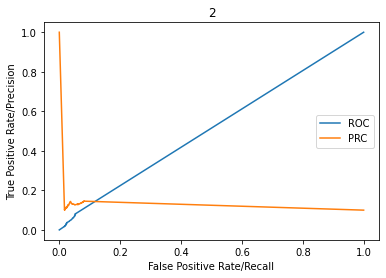

PRC AUC:0.13044612302649342
ROC AUC:0.5139247222222222


In [ ]:
fpr3, tpr3, thresholds3 = roc_curve(Y_test[:,2], probs[:, 2])
prec3, recall3, thresholds3 = precision_recall_curve(Y_test[:,2], probs[:, 2])

plt.plot(fpr3,tpr3,label="ROC")
plt.plot(recall3,prec3,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('2')
plt.show()

print("PRC AUC:" + str(auc(recall3, prec3)))
print("ROC AUC:" + str(auc(fpr3, tpr3)))

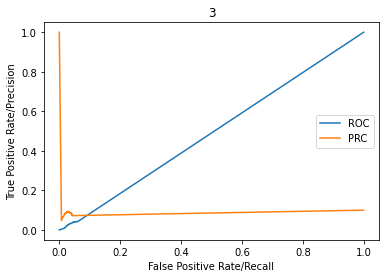

PRC AUC:0.08901086498437871
ROC AUC:0.49098961111111106


In [ ]:
fpr4, tpr4, thresholds4 = roc_curve(Y_test[:,3], probs[:, 3])
prec4, recall4, thresholds4 = precision_recall_curve(Y_test[:,3], probs[:, 3])

plt.plot(fpr4,tpr4,label="ROC")
plt.plot(recall4,prec4,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('3')
plt.show()

print("PRC AUC:" + str(auc(recall4, prec4)))
print("ROC AUC:" + str(auc(fpr4, tpr4)))

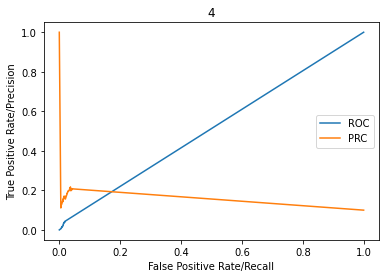

PRC AUC:0.15671724487774663
ROC AUC:0.5123226666666666


In [ ]:
fpr5, tpr5, thresholds5 = roc_curve(Y_test[:,4], probs[:, 4])
prec5, recall5, thresholds5 = precision_recall_curve(Y_test[:,4], probs[:, 4])

plt.plot(fpr5,tpr5,label="ROC")
plt.plot(recall5,prec5,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('4')
plt.show()

print("PRC AUC:" + str(auc(recall5, prec5)))
print("ROC AUC:" + str(auc(fpr5, tpr5)))

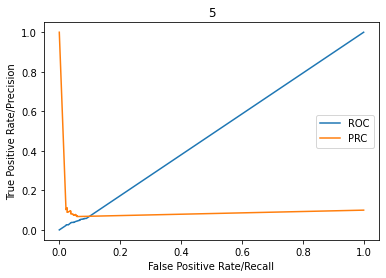

PRC AUC:0.09418920286864632
ROC AUC:0.4851623888888889


In [ ]:
fpr6, tpr6, thresholds6 = roc_curve(Y_test[:,5], probs[:, 5])
prec6, recall6, thresholds6 = precision_recall_curve(Y_test[:,5], probs[:, 5])

plt.plot(fpr6,tpr6,label="ROC")
plt.plot(recall6,prec6,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('5')
plt.show()

print("PRC AUC:" + str(auc(recall6, prec6)))
print("ROC AUC:" + str(auc(fpr6, tpr6)))

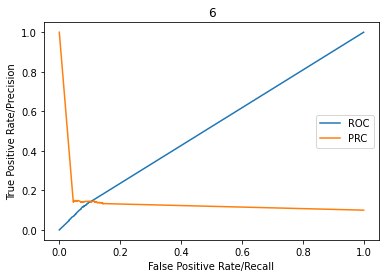

PRC AUC:0.13980537779839847
ROC AUC:0.5203817777777778


In [ ]:
fpr7, tpr7, thresholds7 = roc_curve(Y_test[:,6], probs[:, 6])
prec7, recall7, thresholds7 = precision_recall_curve(Y_test[:,6], probs[:, 6])

plt.plot(fpr7,tpr7,label="ROC")
plt.plot(recall7,prec7,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('6')
plt.show()

print("PRC AUC:" + str(auc(recall7, prec7)))
print("ROC AUC:" + str(auc(fpr7, tpr7)))

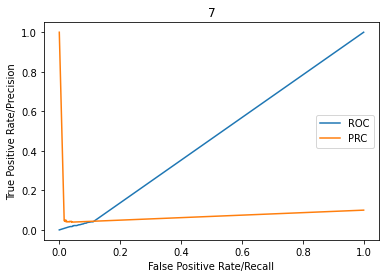

PRC AUC:0.07632231730519629
ROC AUC:0.4651852222222222


In [ ]:
fpr8, tpr8, thresholds8 = roc_curve(Y_test[:,7], probs[:, 7])
prec8, recall8, thresholds8 = precision_recall_curve(Y_test[:,7], probs[:, 7])

plt.plot(fpr8,tpr8,label="ROC")
plt.plot(recall8,prec8,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('7')
plt.show()

print("PRC AUC:" + str(auc(recall8, prec8)))
print("ROC AUC:" + str(auc(fpr8, tpr8)))

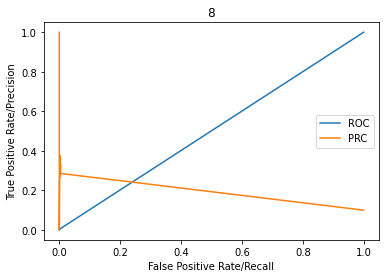

PRC AUC:0.19311195887445887
ROC AUC:0.5014445000000001


In [ ]:
fpr9, tpr9, thresholds9 = roc_curve(Y_test[:,8], probs[:, 8])
prec9, recall9, thresholds9 = precision_recall_curve(Y_test[:,8], probs[:, 8])

plt.plot(fpr9,tpr9,label="ROC")
plt.plot(recall9,prec9,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('8')
plt.show()

print("PRC AUC:" + str(auc(recall9, prec9)))
print("ROC AUC:" + str(auc(fpr9, tpr9)))

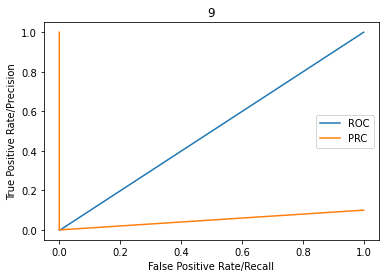

PRC AUC:0.05
ROC AUC:0.4985


In [ ]:
fpr10, tpr10, thresholds10 = roc_curve(Y_test[:,9], probs[:, 9])
prec10, recall10, thresholds10 = precision_recall_curve(Y_test[:,9], probs[:, 9])

plt.plot(fpr10,tpr10,label="ROC")
plt.plot(recall10,prec10,label="PRC")

plt.xlabel('False Positive Rate/Recall')
plt.ylabel('True Positive Rate/Precision')

plt.legend()
plt.title('9')
plt.show()

print("PRC AUC:" + str(auc(recall10, prec10)))
print("ROC AUC:" + str(auc(fpr10, tpr10)))